In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcdefaults()
plt.rcParams.update(
    {
        "font.family": "serif",
        "font.size": 18,
        "figure.dpi": 300,
    }
)

from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


import syclib.utils as utils
from syclib.gendata import *

from syclib.cluster import ClusterSC
from syclib import Matrix, SyntheticControl

# Load data and clean


In [3]:
df = pd.read_csv("hpi_master.csv") # download from https://www.fhfa.gov/data/hpi/datasets?tab=master-hpi-data
df = df[df["frequency"] == "quarterly"]
df.columns

Index(['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name',
       'place_id', 'yr', 'period', 'index_nsa', 'index_sa'],
      dtype='object')

In [4]:
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
4050,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,2,107.83,NaN
4051,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,3,108.11,NaN
4052,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,4,94.49,NaN
4053,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,1,101.00,NaN
4054,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,2,100.73,NaN


In [5]:
# get zip codes as units (not counties)
place_ids = []
for id in df["place_id"].unique():
    try:
        int(id)
        place_ids.append(id)
    except:
        pass
print(len(place_ids))

404


In [7]:
series = []
name = []
types = []
for i in range(len(place_ids)):
    p = place_ids[i]

    group = df[
        (df["place_id"] == p)
        & (df["yr"] < 2007)
        & (df["yr"] >= 1997)
        & (df["hpi_flavor"] == "all-transactions")
    ]

    ix = group["index_nsa"].tolist()
    name.append(df[df["place_id"] == p]["place_name"].iloc[-1])
    series.append(ix)

In [9]:
# only choose series with expected 40 time points
series_len = [len(s) for s in series]
from collections import Counter

Counter(series_len)

Counter({40: 401, 37: 1, 28: 1, 25: 1})

In [10]:
new_series = []
for s in series:
    if len(s) == 40:
        new_series.append(s)

## save clean data

In [11]:
df_clean = pd.DataFrame(new_series)
df_clean.to_csv("hpi_clean_1997_2006.csv", index=False)
df_clean

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,105.36,105.39,108.51,109.22,109.44,108.05,110.66,111.64,112.31,113.55,...,133.43,134.53,136.74,142.10,142.65,144.99,150.50,151.24,155.18,157.85
1,110.93,111.93,114.16,115.37,117.42,118.45,119.75,121.23,122.30,123.51,...,146.21,147.59,148.92,150.21,151.73,152.09,152.59,150.01,149.10,151.13
2,109.48,110.14,111.34,114.63,113.97,114.30,116.85,116.27,118.22,116.94,...,141.29,143.61,144.08,148.75,149.44,155.59,154.71,159.07,157.99,161.70
3,115.31,116.09,118.36,120.77,121.71,123.72,122.93,125.47,124.56,125.57,...,145.11,144.34,146.43,152.97,159.91,164.00,172.33,176.11,182.00,185.65
4,100.03,100.40,99.87,100.95,102.87,101.80,102.29,103.39,103.72,104.01,...,155.07,158.21,162.29,170.18,177.01,179.36,183.81,187.49,187.90,190.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,109.64,109.63,109.62,110.93,112.76,113.20,114.43,115.54,116.31,116.59,...,133.63,134.85,137.48,139.10,142.73,143.75,148.57,152.89,154.90,159.51
397,105.48,106.53,107.43,108.29,110.38,110.41,110.76,111.68,112.70,112.68,...,144.15,146.74,150.63,157.20,164.04,169.80,174.41,178.06,181.32,183.81
398,112.08,115.20,116.05,118.35,119.52,121.08,122.94,124.10,123.82,125.56,...,147.01,147.38,149.00,150.33,152.45,150.86,152.40,150.69,151.22,150.67
399,99.19,97.81,98.26,101.44,103.54,101.47,100.70,103.33,104.59,104.99,...,210.99,223.92,236.63,255.12,265.23,277.32,276.22,270.83,271.70,264.08


# Appendix Plots

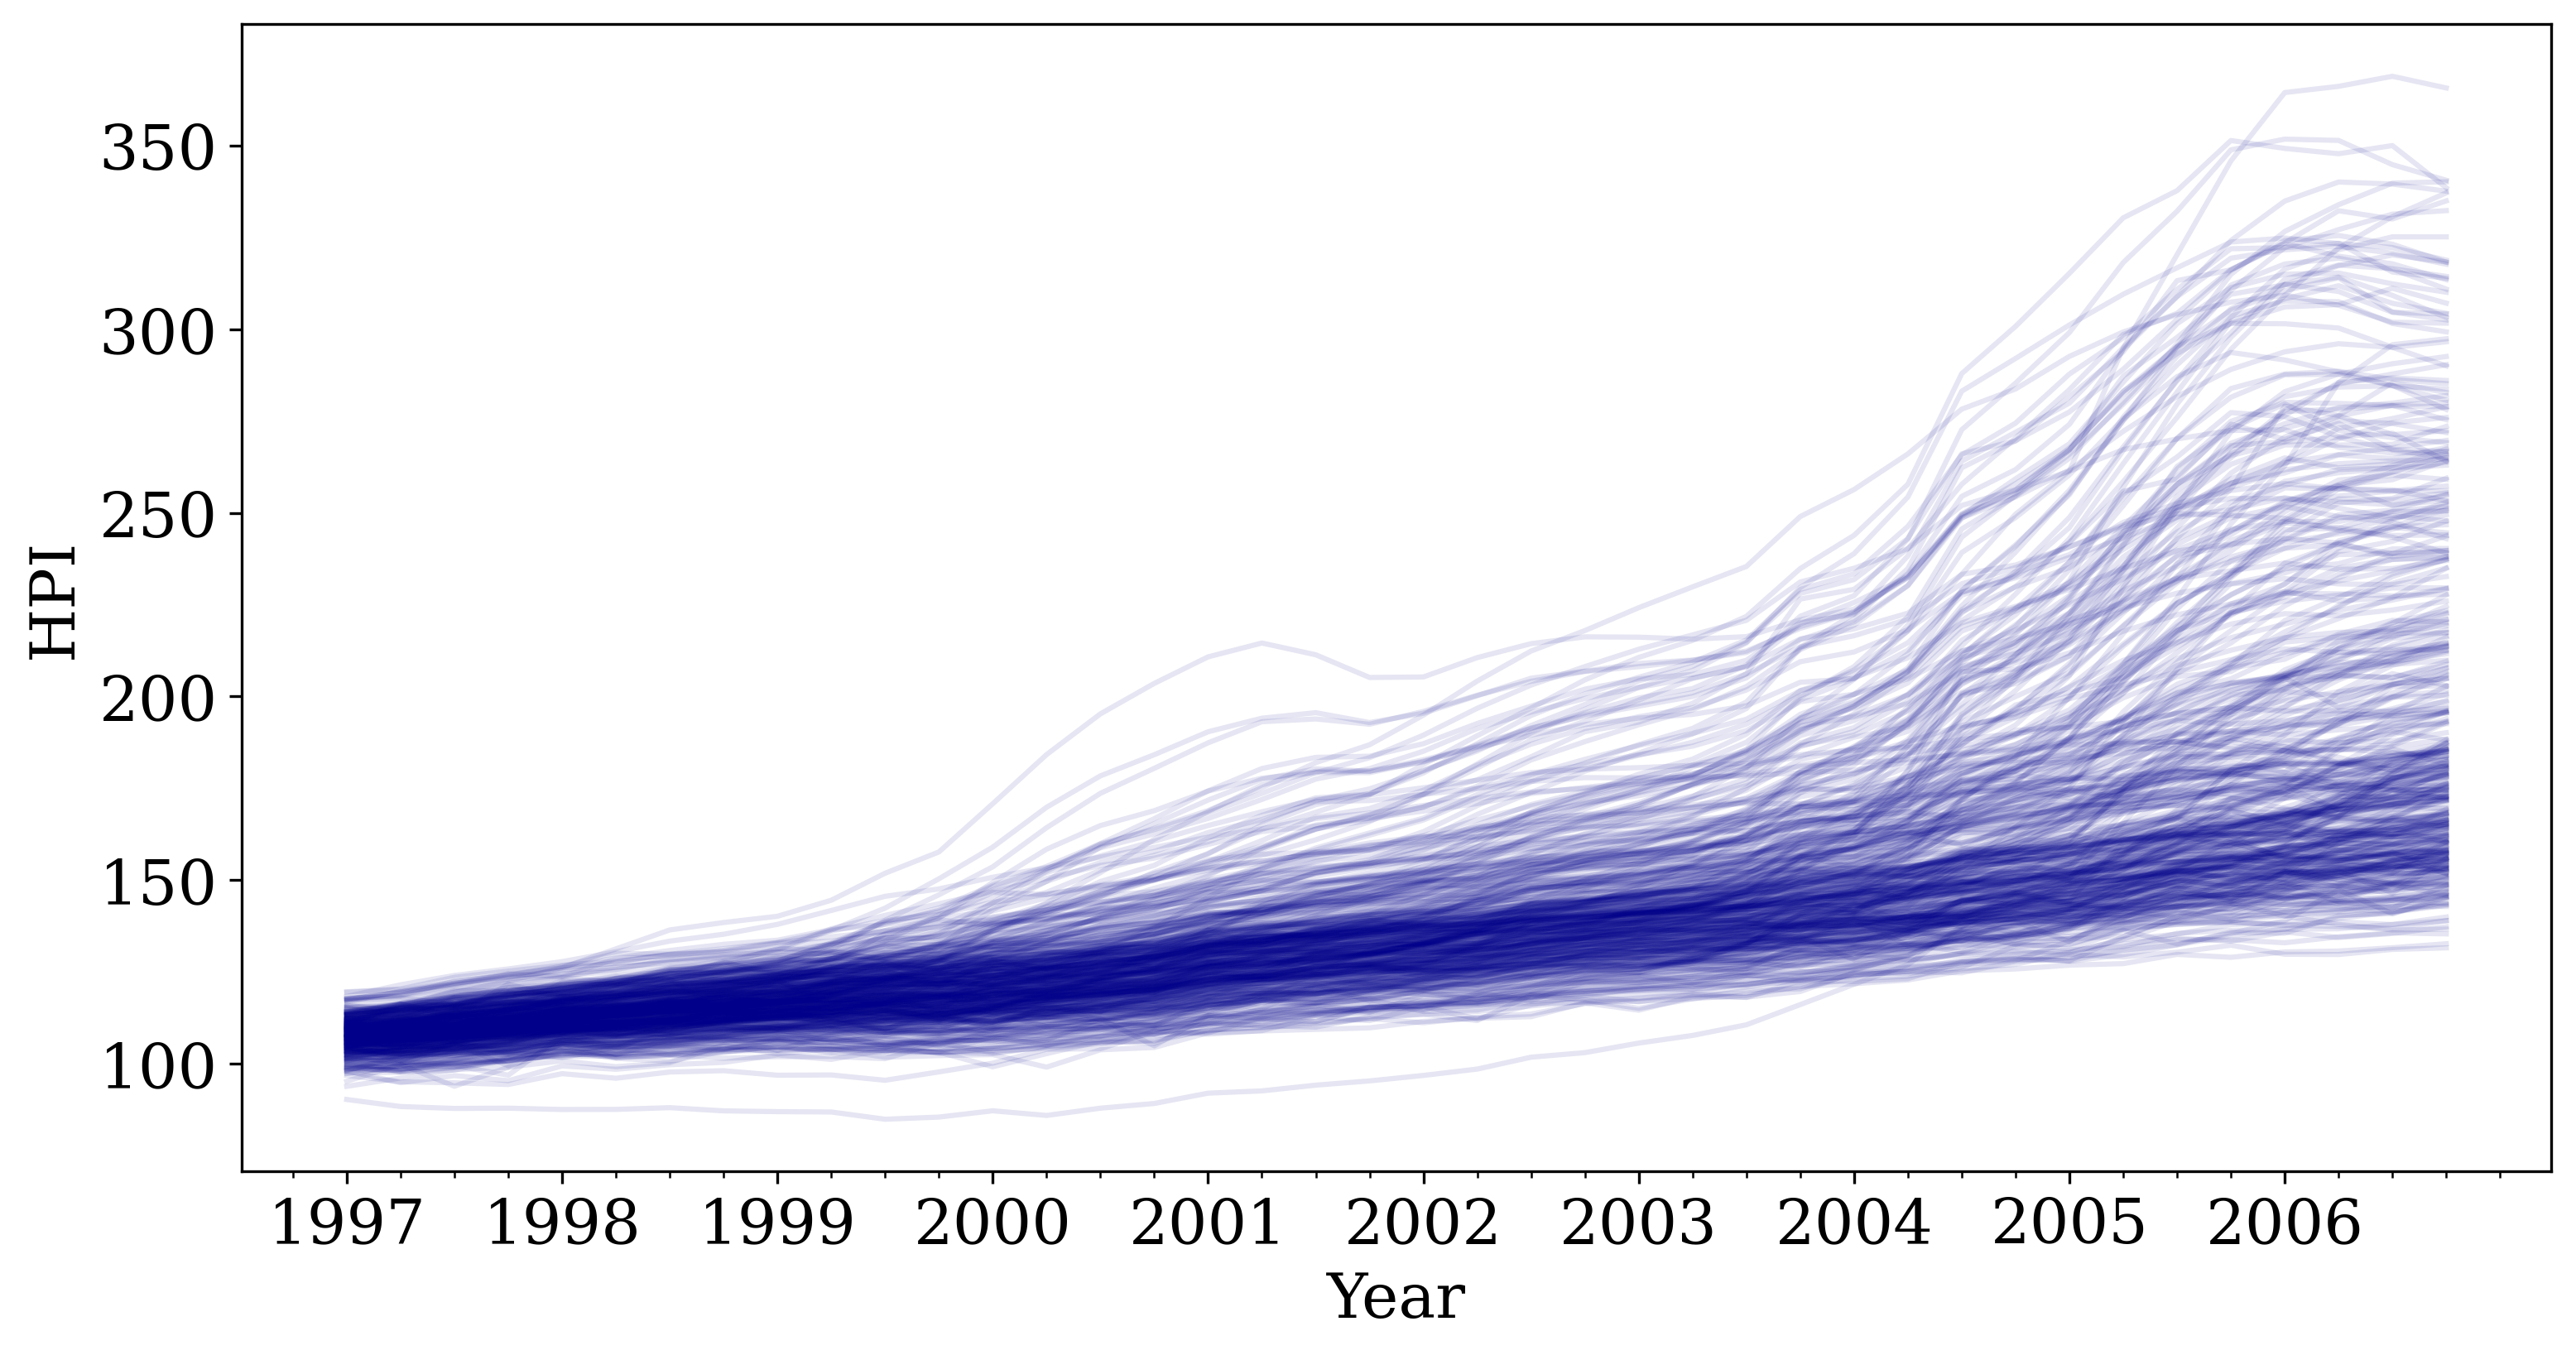

In [ ]:
ax = df_clean.T.plot(legend=False, figsize=(12, 6), color="darkblue", alpha=0.1)
fig = ax.get_figure()
plt.xlabel("Year")
plt.ylabel("HPI")

# tickers
major_step = 4
ax.xaxis.set_major_locator(ticker.MultipleLocator(major_step))
major_positions = np.arange(0, 40, major_step)
labels = np.arange(1997, 2007)
ax.set_xticks(major_positions)
ax.set_xticklabels(labels)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.savefig("plots/hpi_1997_2006")
plt.show()

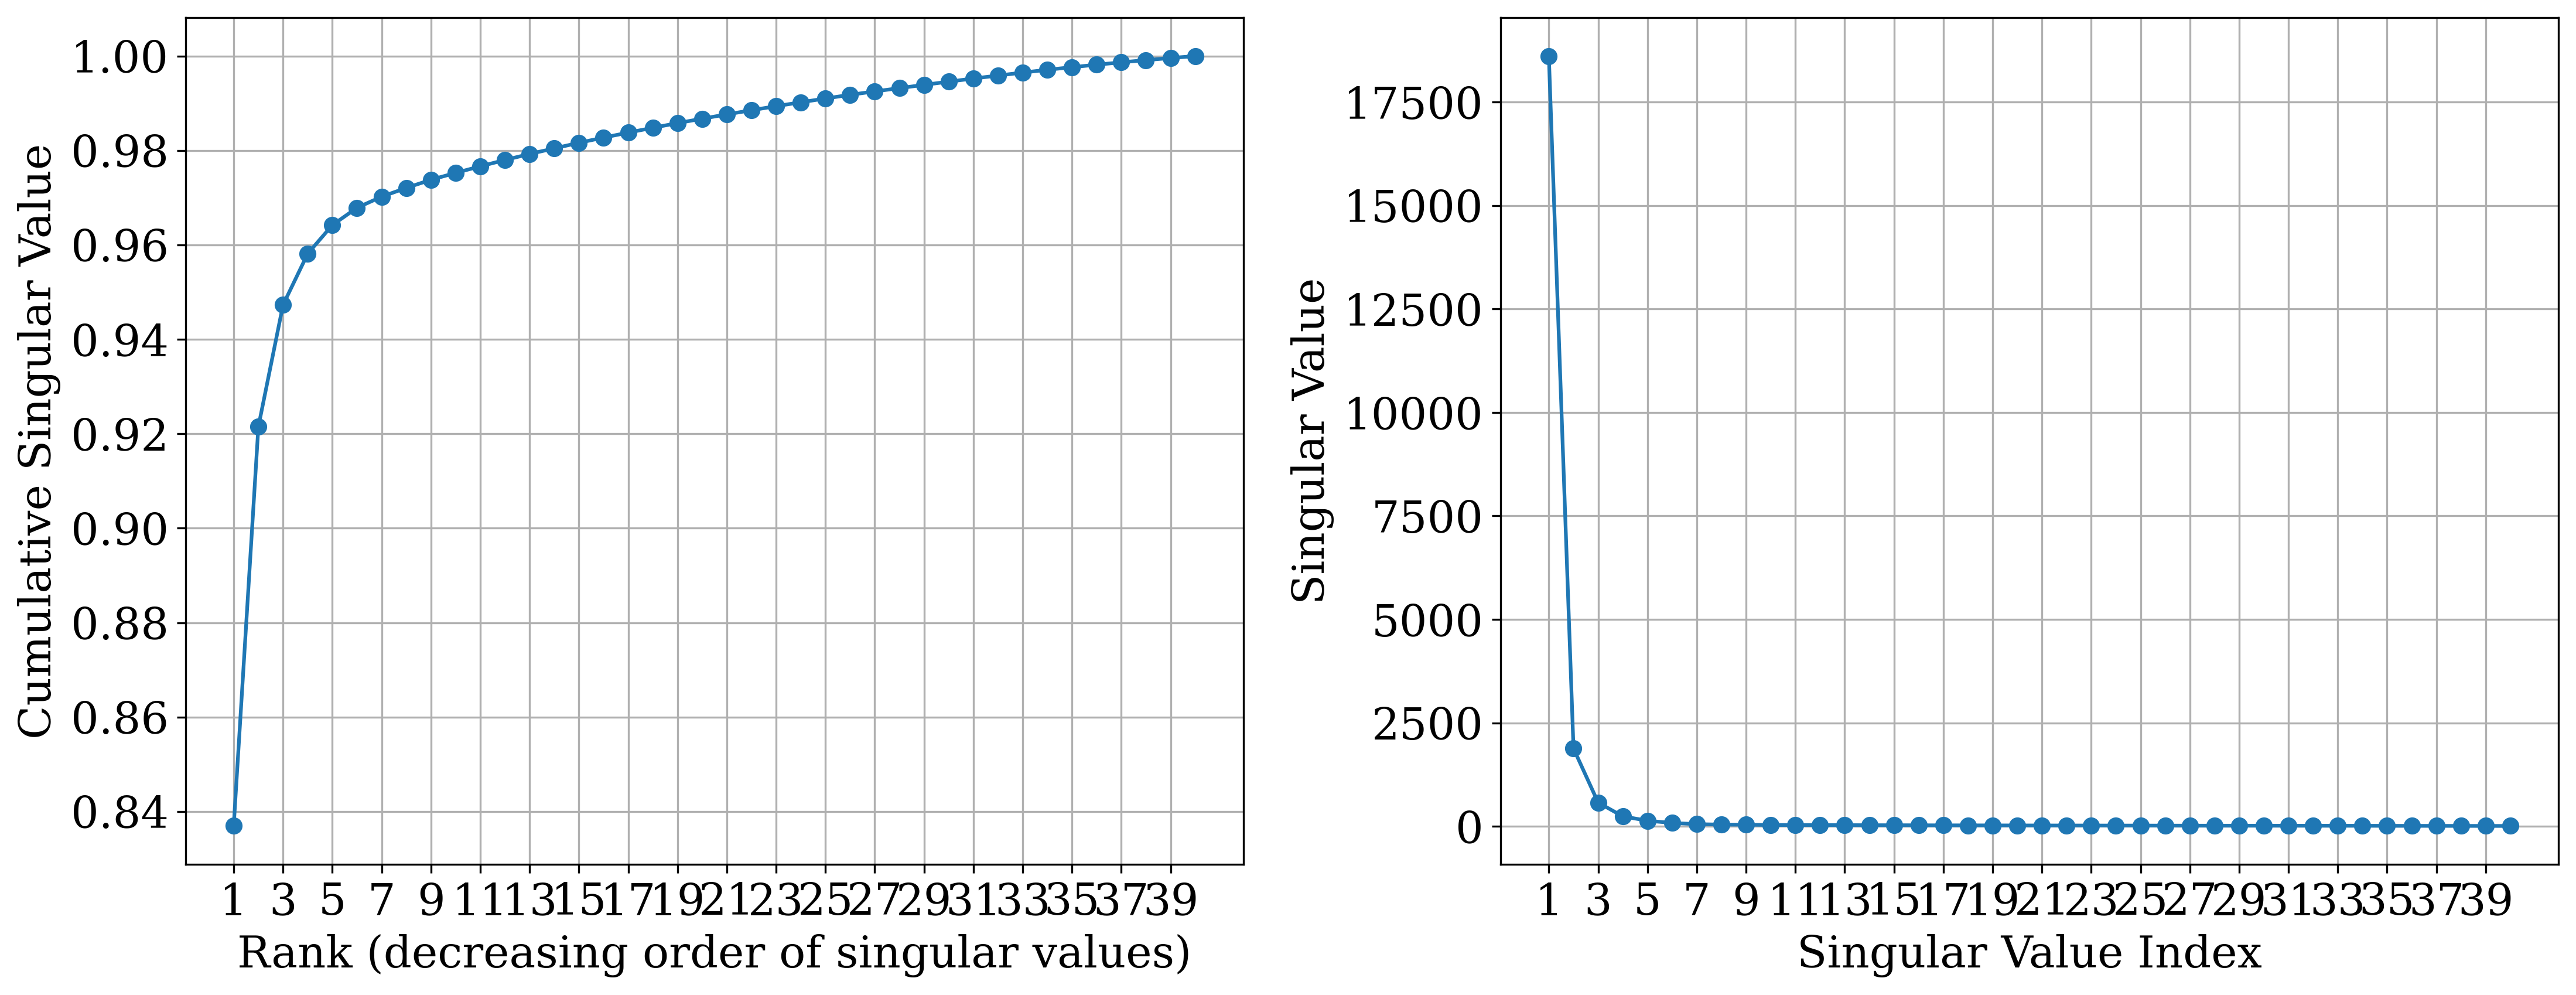

In [20]:
data = df_clean
s = utils.singval_test(data, show=False)
cumulative_singval = np.cumsum(s) / np.sum(s)
n = min(data.shape)

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First plot (Cumulative Singular Values)
ax1.plot(np.arange(1, n + 1), cumulative_singval[:n], marker="o")
ax1.set_xticks(np.arange(1, n + 1, 2))
ax1.grid()
ax1.set_xlabel("Rank (decreasing order of singular values)")
ax1.set_ylabel("Cumulative Singular Value")

# Second plot (Singular Values)
ax2.plot(np.arange(1, n + 1), s[:n], marker="o")
ax2.set_xticks(np.arange(1, n + 1, 2))
ax2.grid()
ax2.set_ylabel("Singular Value")
ax2.set_xlabel("Singular Value Index")

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig("hpi_singular_values")
plt.show()